<a href="https://colab.research.google.com/github/sokrypton/ws2023/blob/main/day1/quick_intro_to_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import jax.numpy as jnp

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
jnp.zeros(10)

Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import jax

In [ ]:
def square(x):
  return jnp.square(x)

In [ ]:
square(10.0)

Array(100., dtype=float32, weak_type=True)

In [ ]:
grad_square = jax.grad(square)

In [ ]:
grad_square(10.0)

Array(20., dtype=float32, weak_type=True)

In [ ]:
def linear(params, inputs):
  # y = mx + b
  y = params["m"] * inputs["x"] + params["b"]
  loss = jnp.square(y - inputs["y"])
  return loss.mean()

In [ ]:
x = np.random.normal(size=(10,))
y = 2.0 * x + 5.0

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
params = {"m":1.0,"b":0.0}
inputs = {"x":x, "y":y}

In [ ]:
# output is loss
linear(params, inputs)

Array(27.926731, dtype=float32)

[]

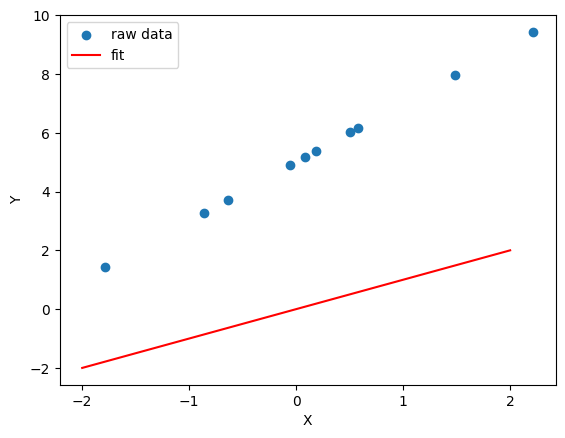

In [ ]:
plt.scatter(inputs["x"],inputs["y"],label="raw data")
plt.plot(np.linspace(-2,2,10),
         np.linspace(-2,2,10) * params["m"] + params["b"], label="fit", color="red") 
plt.xlabel("X");plt.ylabel("Y")
plt.legend()
plt.plot()

In [ ]:
grad_linear = jax.grad(linear)

In [ ]:
# output is gradient (or partial derivative) on how to update variables to minimize loss
grad_linear(params, inputs)

{'b': Array(-10.343814, dtype=float32, weak_type=True),
 'm': Array(-4.1343923, dtype=float32, weak_type=True)}

In [ ]:
for i in range(50):
  grad = grad_linear(params, inputs)
  # params["m"] = params["m"] - 0.1 * grad["m"]
  # params["b"] = params["b"] - 0.1 * grad["b"]
  params = jax.tree_map(lambda x,g: x-0.1*g, params, grad)
  print(i, linear(params, inputs))

0 16.941368
1 10.386545
2 6.4339385
3 4.025024
4 2.5414257
5 1.618391
6 1.0385664
7 0.671066
8 0.43622944
9 0.2850612
10 0.18711774
11 0.12329769
12 0.08150799
13 0.054028638
14 0.035894975
15 0.023892524
16 0.015928308
17 0.010632455
18 0.0071049123
19 0.0047518387
20 0.0031803579
21 0.0021298395
22 0.0014269747
23 0.0009564501
24 0.0006412791
25 0.00043006922
26 0.00028848308
27 0.0001935404
28 0.00012986931
29 8.7150685e-05
30 5.8489917e-05
31 3.9260085e-05
32 2.635038e-05
33 1.7689412e-05
34 1.1875074e-05
35 7.972939e-06
36 5.3518806e-06
37 3.593323e-06
38 2.412399e-06
39 1.6195769e-06
40 1.0870543e-06
41 7.295861e-07
42 4.899011e-07
43 3.2887246e-07
44 2.2079506e-07
45 1.482217e-07
46 9.959342e-08
47 6.694715e-08
48 4.496969e-08
49 3.0180452e-08


In [ ]:
params

{'b': Array(4.9998403, dtype=float32, weak_type=True),
 'm': Array(2.000089, dtype=float32, weak_type=True)}

[]

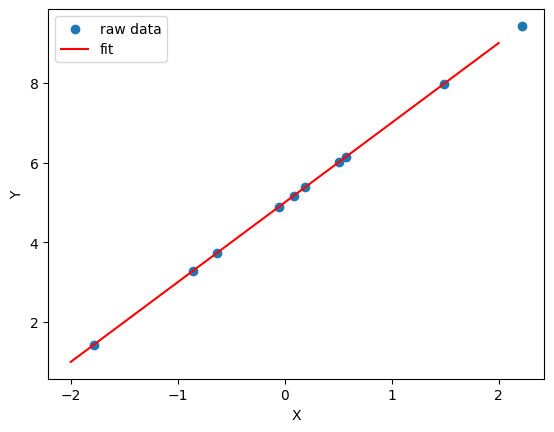

In [ ]:
plt.scatter(inputs["x"],inputs["y"],label="raw data")
plt.plot(np.linspace(-2,2,10),
         np.linspace(-2,2,10) * params["m"] + params["b"], label="fit", color="red") 
plt.xlabel("X");plt.ylabel("Y")
plt.legend()
plt.plot()